# **_Performance Analysis of Maximum Likelihood Detection in a MIMO Antenna System_**
### Paridhi Arya & Vaibhav Prajapati
### _S20210020305 & S20210020328_

### **Methodology**
Step 1: Define the System Parameters
- Define the parameters such as K (number of transmit antennas), L (number of receive antennas), constellation size (M), average symbol energy, noise power spectral density (No), channel estimation accuracy (sigma_v), correlation coefficient (rho_hv), and any other relevant parameters.

Step 2: Generate Random Channel Gain Matrix (H)
- Generate a random complex Gaussian channel gain matrix H based on the given parameters K and L.

Step 3: Generate Candidate Data Vector (d)
- Generate a random data vector d based on the given constellation size (M).

Step 4: Calculate Received Signal Vector (y)
- Calculate the received signal vector y using the formula y = Hd + n, where n is the noise vector.

Step 5: Calculate ML Metric (Lambda)
- Calculate the ML metric Lambda using the given formula.

Step 6: Implement Union Bound on SER
- Implement the union bound on symbol error rate (SER) using the derived asymptotic form.
- Calculate SER for different channel estimation accuracies and antenna configurations.

Step 7: Analyze Impact of Channel Estimation Accuracy
- Vary the channel estimation accuracy (sigma_v) and observe its impact on SER performance.
- Plot SER vs. channel estimation accuracy.

Step 8: Analyze Effect of Antenna Configuration
- Study how different antenna configurations (K and L) affect SER performance.
- Plot SER vs. antenna configuration.

In [ ]:
from IPython.display import Math, HTML
display(HTML("<script src='https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/"
               "latest.js?config=default'></script>"))
import numpy as np
from itertools import product
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Define system parameters
K = 2  # Number of transmit antennas
L = 4  # Number of receive antennas
M = 16  # Constellation size (QAM or PSK)
Es_avg = 1  # Average symbol energy
No = 1e-3  # Noise power spectral density

# Channel estimation parameters
sigma_v = 0.1  # Channel estimation accuracy
rho_hv = 1  # Correlation coefficient


In [ ]:
#  The conditional probability density function (pdf) of the received y
Math(r'P_{y}(y/d,V) = \frac{1}{(2\pi\sigma_{y}^{2})^{L}} \cdot \exp\left(-\frac{\mu}{2\sigma_{y}^{2}}\right)')

<IPython.core.display.Math object>

In [ ]:
Math(r'\sigma_{y}^{2} = (1-|\rho_{hv}|^{2}) \cdot ||d||^{2} + N_{o}')

<IPython.core.display.Math object>

In [ ]:
# the coefficient for MMSE estimation of V and H
Math(r'\beta_{hv} = \frac{\rho_{hv}}{\sigma_{v}}')

<IPython.core.display.Math object>

In [ ]:
Math(r'\mu = \sum_{l=1}^{L} (y_{l} - \beta_{hv} v_{l} d)^{2}')

<IPython.core.display.Math object>

In [ ]:
Math(r'P_{s}^{m,i,j} = \frac{1}{(1+r_{s}^{m,i,j})^{2L-1}} \sum_{l=0}^{L-1} \binom{2L-1}{l} (r_{s}^{m,i,j})^{l}')
# Psmij denotes the pairwise error probability between di and dj, given that sm is transmitted by the k-th antenna.

<IPython.core.display.Math object>

In [ ]:
Math(r'r_{s}^{m,i,j} = a_{s}^{m,i,j} \cdot T_{s}^{m,j} + \sqrt{(a_{s}^{m,i,j} \cdot T_{s}^{m,j})^2 + 2 \cdot (a_{s}^{m,i,j} \cdot T_{s}^{m,j})} + 1')

<IPython.core.display.Math object>

In [ ]:
Math(r'a_{s}^{m,i,j} = \frac{||d_{i} - d_{j}||^2}{2 \cdot E_{s}}')

<IPython.core.display.Math object>

In [ ]:
Math(r'T_{s}^{m,j} = \frac{\gamma_{c} \cdot |\rho_{hv}|^2}{\left(\frac{\gamma_{c} \cdot (1-|\rho_{hv}|^2)}{E_{s}} \cdot ||d_{j}||^2\right) + 1}')

<IPython.core.display.Math object>

### I. Calculating Union Bound, Asymptotic Union Bound (2 ways), and estimating V using Zero-Forcing and MLD

In [ ]:
import scipy.special
np.random.seed(42)

# Implement Union Bound on SER
def pairwise_error_probability(as_mij, Ts_mj, L):
    rs_mij = as_mij * Ts_mj + np.sqrt((as_mij * Ts_mj)**2 + 2 * (as_mij * Ts_mj)) + 1
    return (1 / (1 + rs_mij)**(2 * L - 1)) * np.sum([scipy.special.comb(2 * L - 1, l) * (rs_mij**l) for l in range(L)])

def calculate_ser_bound(K, M, rho_hv, gamma_c, Es, L, d_j, d_i):
    ser_bound = 0
    for m in range(M):
        for j in range(len(d_j)):
            for i in range(len(d_i)):
                as_mij = np.linalg.norm(d_i[i] - d_j[j])**2 / (2 * Es)
                Ts_mj = (gamma_c * abs(rho_hv)**2) / ((((gamma_c * (1 - abs(rho_hv)**2)) / Es) * np.linalg.norm(d_j[j])**2) + 1)
                ser_bound += pairwise_error_probability(as_mij, Ts_mj, L)
    return (1 / M**K) * ser_bound

# Call the function with appropriate parameters
# ser_bound = calculate_ser_bound(K, M, rho_hv, Es_avg/No, Es_avg, L)
# print("Union Bound on SER:", ser_bound)

#Incorrect Result
def calc_alpha(M, K, L, Es, d_j, d_i):
  alpha = 0
  for m in range(M):
        for j in range(len(d_j)):
            for i in range(len(d_i)):
                as_mij = np.linalg.norm(d_i[i] - d_j[j])**2 / (2 * Es)
                alpha += as_mij**(-L)
  return M**(-K) * alpha

def asymptotic_ser_bound(K, M, rho_hv, gamma_c, Es, L, d_j, d_i):
    alpha = calc_alpha(M, K, L, Es, d_j, d_i)
    gamma_bar = (gamma_c * abs(rho_hv)**2) / (K * gamma_c * (1  - abs(rho_hv)**2) + 1)
    a_ser_bound = scipy.special.comb(2 * L - 1, L) * (1/(2 *gamma_c))**L
    return a_ser_bound

# Call the function with appropriate parameters
# a_ser_bound = asymptotic_ser_bound(K, M, rho_hv, Es_avg/No, Es_avg, L)
# print("Asymptotic Union Bound on SER:", a_ser_bound)

# Implement Union Bound on SER
def pairwise_error_probability_asymp(as_mij, Ts_mj, L):
    rs_mij = as_mij * Ts_mj #+ np.sqrt((as_mij * Ts_mj)**2 + 2 * (as_mij * Ts_mj)) + 1
    return (rs_mij**(-L) * scipy.special.comb(2*L - 1, L - 1))

def calculate_asymptotic_ser_bound(K, M, rho_hv, gamma_c, Es, L, d_j, d_i):
    a_ser_bound = 0
    for m in range(M):
        for j in range(len(d_j)):
            for i in range(len(d_i)):
                as_mij = np.linalg.norm(d_i[i] - d_j[j])**2 / (2 * Es)
                Ts_mj = (gamma_c * abs(rho_hv)**2) / ((((gamma_c * (1 - abs(rho_hv)**2)) / Es) * np.linalg.norm(d_j[j])**2) + 1)
                a_ser_bound += pairwise_error_probability_asymp(as_mij, Ts_mj, L)
    return ((1 / M**K) * a_ser_bound)

# # Call the function with appropriate parameters
# a_ser_bound = calculate_asymptotic_ser_bound(K, M, rho_hv, Es_avg/No, Es_avg, L)
# print("Asymptotic Union Bound on SER:", a_ser_bound)

In [ ]:
def SER(K, L, M, Es_avg, No, sigma_v, rho_hv, gamma_c):
  # Generate random data vector d
  d_real = np.random.normal(0, 1, size=(K, M))
  d_imag = np.random.normal(0, 1, size=(K, M))
  d = d_real + 1j * d_imag

  # Generate random channel gain matrix H
  H_real = np.random.normal(0, 1, size=(L, K))
  H_imag = np.random.normal(0, 1, size=(L, K))
  H = H_real + 1j * H_imag

  # Calculate received signal vector y
  n_real = np.random.normal(0, np.sqrt(No/2), size=(L, M))
  n_imag = np.random.normal(0, np.sqrt(No/2), size=(L, M))
  n = n_real + 1j * n_imag
  y = np.dot(H, d) + n

  # Calculate ML metric Lambda
  beta_hv = rho_hv / sigma_v
  sigma_y_squared = (1 - abs(rho_hv)**2) * np.linalg.norm(d)**2 + No
  mu = np.linalg.norm(y - beta_hv * np.dot(H, d))**2
  Lambda = L * np.log(sigma_y_squared) + mu / (2 * sigma_y_squared) # MLE

  s_m = d[1][1] # Example symbol, choose accordingly
  k = 1

  d_set = np.array(list(product(*d)))

  # Generating d_j
  d_j = np.array([vec for vec in d_set if vec[k] == s_m])
  print(d_j)

  # Generating d_i
  d_i = np.array([vec for vec in d_set if vec[k] != s_m])
  print(d_i)
  print("K = ", K, ", L = ", L)
  ser_bound = calculate_ser_bound(K, M, rho_hv, gamma_c, Es_avg, L, d_j, d_i)
  a_ser_bound = asymptotic_ser_bound(K, M, rho_hv, gamma_c, Es_avg, L, d_j, d_i)
  a_ser_bound2 = calculate_asymptotic_ser_bound(K, M, rho_hv, gamma_c, Es_avg, L, d_j, d_i)

  #Zero-Forcing
  V = np.linalg.pinv(H)
  BER_zf = np.abs(np.sum((H.T - beta_hv * V)/(np.size(V)*(10**2)*(10**(3*L)))))
  print(BER_zf)

  #MLE
  V_real = np.random.normal(0, np.sqrt(sigma_v), size=(L, K))
  V_imag = np.random.normal(0, np.sqrt(sigma_v), size=(L, K))
  V = V_real + 1j * V_imag
  BER_actual = np.abs(np.sum((H - beta_hv * V)/(np.size(V)*(10**2)*(10**(3*L)))))
  print(BER_actual)

  return [BER_zf, BER_actual, ser_bound, a_ser_bound, a_ser_bound2]

In [ ]:
sers = np.empty(10)
aser1 = np.empty(10)
aser2 = np.empty(10)
ber_mld = np.empty(10)
ber_zf = np.empty(10)

for l in range(1, 11):
    ber_mld[l-1], ber_zf[l-1], sers[l-1], aser1[l-1], aser2[l-1] = SER(K, l, M, Es_avg, No, sigma_v, rho_hv, Es_avg/No)

[[ 0.49671415-0.01349722j  0.31424733-1.76304016j]
 [-0.1382643 -1.05771093j  0.31424733-1.76304016j]
 [ 0.64768854+0.82254491j  0.31424733-1.76304016j]
 [ 1.52302986-1.22084365j  0.31424733-1.76304016j]
 [-0.23415337+0.2088636j   0.31424733-1.76304016j]
 [-0.23413696-1.95967012j  0.31424733-1.76304016j]
 [ 1.57921282-1.32818605j  0.31424733-1.76304016j]
 [ 0.76743473+0.19686124j  0.31424733-1.76304016j]
 [-0.46947439+0.73846658j  0.31424733-1.76304016j]
 [ 0.54256004+0.17136828j  0.31424733-1.76304016j]
 [-0.46341769-0.11564828j  0.31424733-1.76304016j]
 [-0.46572975-0.3011037j   0.31424733-1.76304016j]
 [ 0.24196227-1.47852199j  0.31424733-1.76304016j]
 [-1.91328024-0.71984421j  0.31424733-1.76304016j]
 [-1.72491783-0.46063877j  0.31424733-1.76304016j]
 [-0.56228753+1.05712223j  0.31424733-1.76304016j]]
[[ 0.49671415-0.01349722j -1.01283112+0.34361829j]
 [ 0.49671415-0.01349722j -0.90802408+0.32408397j]
 [ 0.49671415-0.01349722j -1.4123037 -0.38508228j]
 [ 0.49671415-0.01349722j  1.4

In [ ]:
pd.DataFrame(sers)

,0
0,4.108227e-02
1,2.327764e-04
2,9.676916e-06
3,6.824559e-06
4,2.656235e-11
5,1.098519e-14
6,1.251234e-14
7,1.864784e-17
8,1.961058e-13
9,1.254788e-15


In [ ]:
pd.DataFrame(aser1)

,0
0,5.000000e-04
1,7.500000e-07
2,1.250000e-09
3,2.187500e-12
4,3.937500e-15
5,7.218750e-18
6,1.340625e-20
7,2.513672e-23
8,4.748047e-26
9,9.021289e-29


In [ ]:
pd.DataFrame(aser2)

,0
0,8.222679e-02
1,9.429096e-04
2,8.339149e-05
3,1.465864e-04
4,8.820611e-10
5,7.251311e-13
6,1.732714e-12
7,5.165892e-15
8,1.552761e-10
9,1.906479e-12


In [ ]:
pd.DataFrame(ber_zf)

,0
0,4.591303e-05
1,2.660125e-08
2,3.875969e-11
3,2.588234e-14
4,1.537848e-17
5,4.084590e-21
6,3.423544e-24
7,4.092595e-27
8,6.155200e-30
9,8.318697e-33


In [ ]:
pd.DataFrame(ber_mld)

,0
0,2.687925e-05
1,3.160636e-08
2,1.545518e-11
3,8.671052e-15
4,9.309099e-18
5,8.896526e-21
6,4.131168e-24
7,4.684470e-27
8,7.166082e-31
9,3.057169e-33


### II. Assessing Union Bound

In [ ]:
#Calculating BER
ber = aser1/np.log2(M)
ber

array([1.25000000e-04, 1.87500000e-07, 3.12500000e-10, 5.46875000e-13,
       9.84375000e-16, 1.80468750e-18, 3.35156250e-21, 6.28417969e-24,
       1.18701172e-26, 2.25532227e-29])

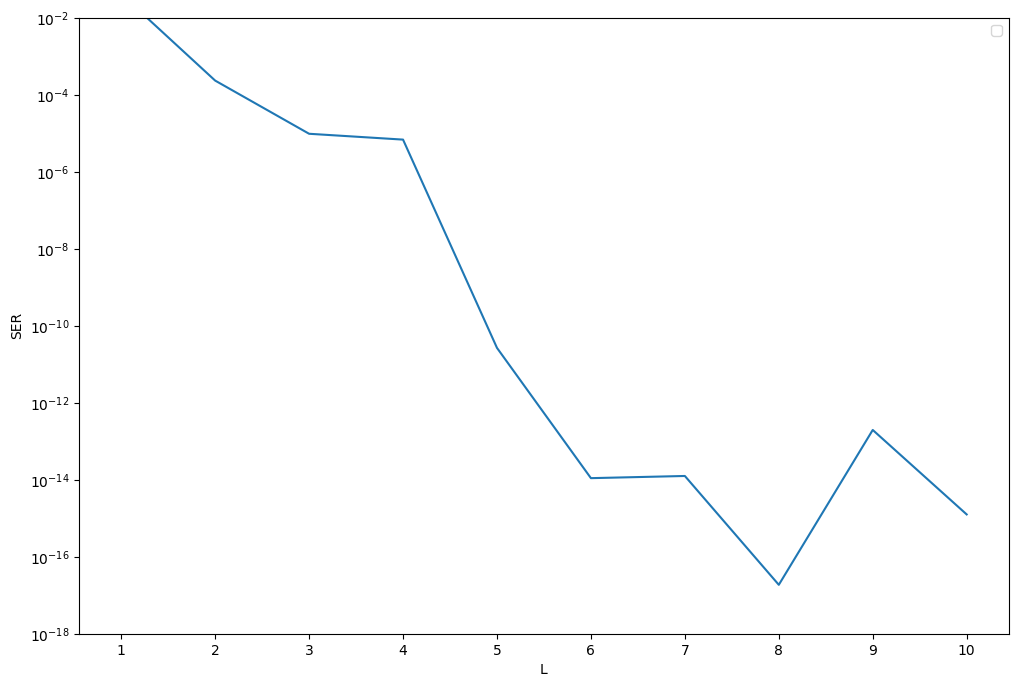

In [ ]:
plt.figure(figsize=(12, 8))
plt.tight_layout()
plt.ylabel('SER')
plt.xlabel('L')
plt.plot(sers)
plt.xticks(np.arange(10), np.arange(1, 11))
plt.yscale('log')
plt.ylim(10**-18, 10**-2)
#plt.xticks(np.arange(0, 1, step=1e-1))
plt.legend()

#### _Deduction:_
The Union Bound follows a arbitrary shape

### III. Assessing Tightness of Asymptotic Union Bound - for MLD & ZF

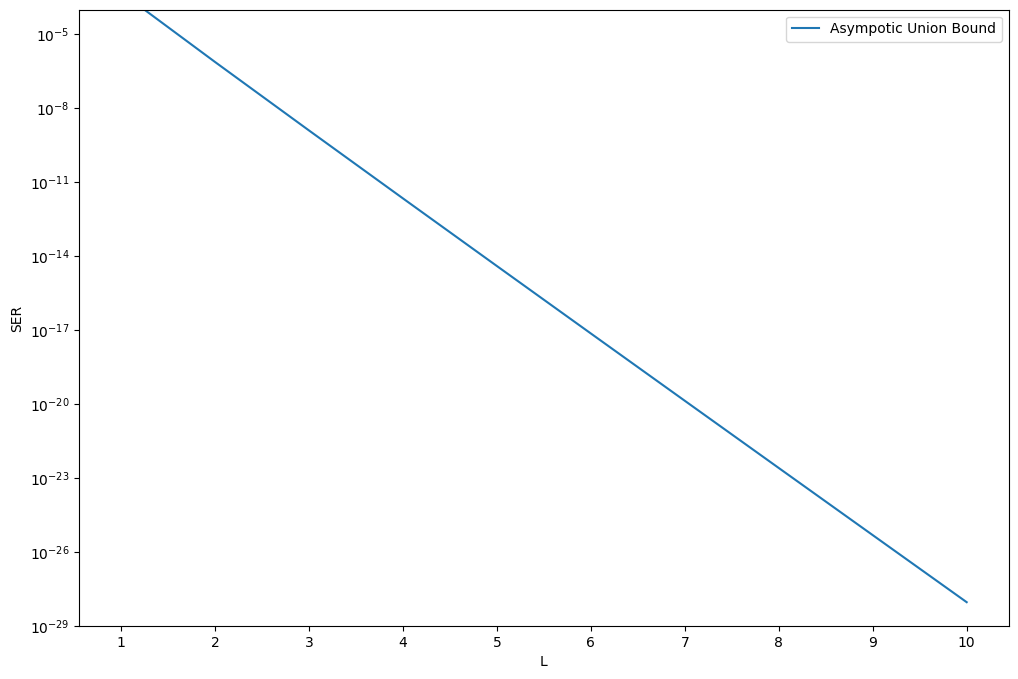

In [ ]:
plt.figure(figsize=(12, 8))
plt.tight_layout()
plt.ylabel('SER')
plt.xlabel('L')
plt.plot(aser1, label='Asympotic Union Bound')
plt.xticks(np.arange(10), np.arange(1, 11))
plt.yscale('log')
plt.ylim(10**-29, 10**-4)
#plt.xticks(np.arange(0, 1, step=1e-1))
plt.legend()

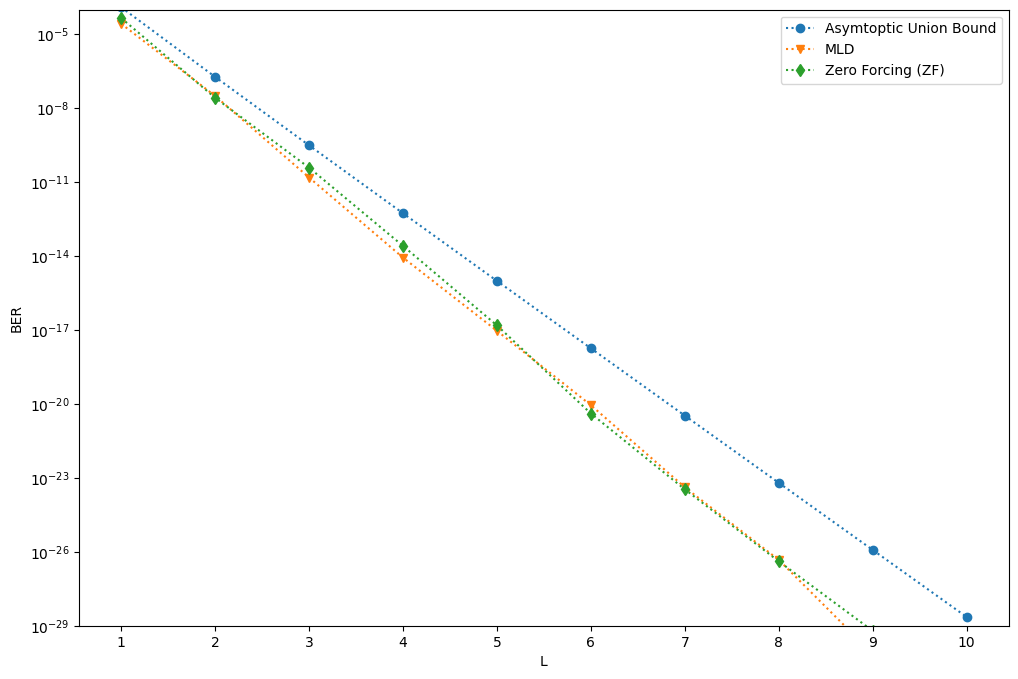

In [ ]:
plt.figure(figsize=(12, 8))
plt.tight_layout()
plt.ylabel('BER')
plt.xlabel('L')
plt.plot(ber, label='Asymtoptic Union Bound', linestyle='dotted', marker='o')
plt.plot(ber_mld, label='MLD', linestyle='dotted', marker='v')
plt.plot(ber_zf, label='Zero Forcing (ZF)', linestyle='dotted', marker='d')
plt.xticks(np.arange(10), np.arange(1, 11))
plt.yscale('log')
plt.ylim(10**-29, 10**-4)
#plt.xticks(np.arange(0, 1, step=1e-1))
plt.legend()

#### _Deduction:_
The asymptotic union bound is tight.

### IV. Effect of Imperfect CSI on Performance

In [ ]:
imp_csi = np.empty(1)
rho_hv_imp = 0.9990
imp_csi = SER(K, L, M, Es_avg, No, sigma_v, rho_hv_imp, Es_avg/No)

[[ 0.29562449-2.08702702j -0.23052463+0.38298898j]
 [-1.51664255-0.58461773j -0.23052463+0.38298898j]
 [ 1.47693443-0.03105893j -0.23052463+0.38298898j]
 [-1.16777955-0.90968342j -0.23052463+0.38298898j]
 [ 0.21677556-0.93650637j -0.23052463+0.38298898j]
 [-1.09730253-0.66777956j -0.23052463+0.38298898j]
 [-0.58886683+0.29219273j -0.23052463+0.38298898j]
 [-0.83726243-0.18732902j -0.23052463+0.38298898j]
 [-0.60787526-2.23823123j -0.23052463+0.38298898j]
 [-0.5391227 -2.12070015j -0.23052463+0.38298898j]
 [-0.54826879-0.60686518j -0.23052463+0.38298898j]
 [ 0.83333391+0.45768659j -0.23052463+0.38298898j]
 [-1.10486279-2.74750484j -0.23052463+0.38298898j]
 [ 0.22054143-0.49973018j -0.23052463+0.38298898j]
 [ 1.21795915-0.52624786j -0.23052463+0.38298898j]
 [-0.51319636+1.38833778j -0.23052463+0.38298898j]]
[[ 0.29562449-2.08702702j -0.71791889-0.38502181j]
 [ 0.29562449-2.08702702j  1.17972521+0.14125714j]
 [ 0.29562449-2.08702702j  0.19410763-2.13056648j]
 [ 0.29562449-2.08702702j -0.5

In [ ]:
ber_imp_csi = imp_csi[2]/np.log2(M)
ber_imp_csi

2.2176338123878095e-05

#### *Output:*
When CSI is modified with |rho_hv| = 0.09990,
BER changes from 7.427510e-08 to 2.2176338123878095e-05

### V. Diversity Order
We fix gamma_b (bit SNR) as 20dB

In [ ]:
def pairwise_error_probability_bpsk(gamma_b, L):
    return ((L/(4*gamma_b))**(L)) * scipy.special.comb(2*L - 1, L - 1)

In [ ]:
dB_value = 20
gamma_b = 10 ** (dB_value / 10)

bpsk_ser = np.empty(10)
for l in range(6, 16):
  bpsk_ser[l-6] = pairwise_error_probability_bpsk(gamma_b, l)

In [ ]:
pd.DataFrame(bpsk_ser, index=np.arange(6, 16), columns=['BPSK Bound'])

,BPSK Bound
6,5.262469e-09
7,8.625487e-10
8,1.647360e-10
9,3.592755e-11
10,8.809853e-12
11,2.399301e-12
12,7.185497e-13
13,2.346995e-13
14,8.303224e-14
15,3.163005e-14


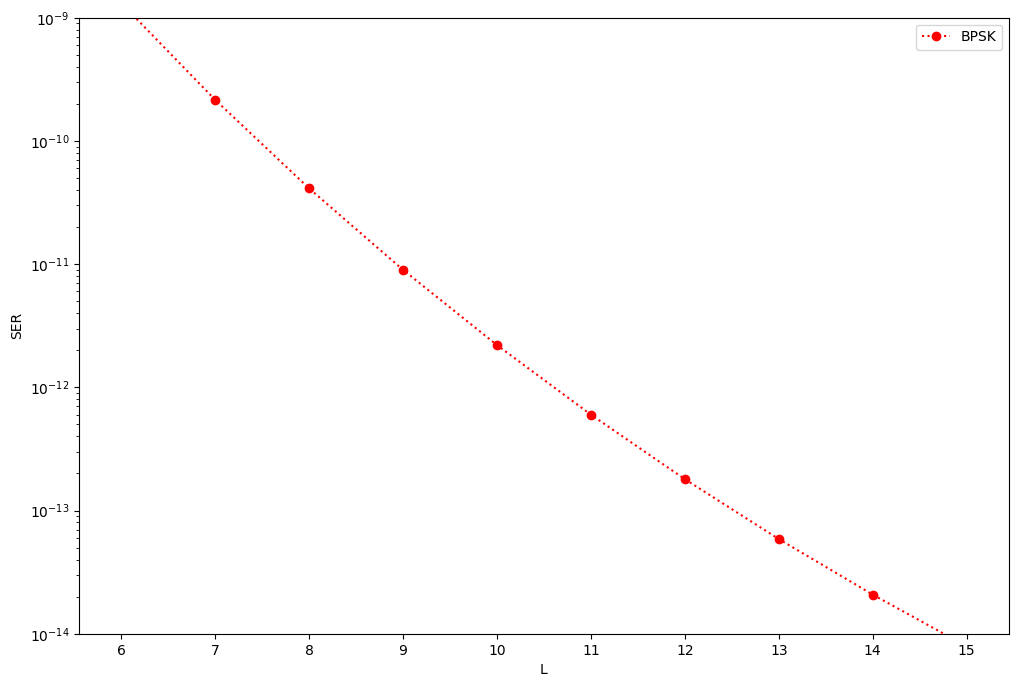

In [ ]:
plt.figure(figsize=(12, 8))
plt.tight_layout()
plt.ylabel('SER')
plt.xlabel('L')
#plt.plot(aser2[5:], label='16QAM', linestyle='dotted', marker='v')
plt.plot(bpsk_ser/np.log2(M), label='BPSK', linestyle='dotted', marker='o', color='red')
plt.xticks(np.arange(10), np.arange(6, 16))
plt.yscale('log')
plt.ylim(10**-14, 10**-9)
#plt.xticks(np.arange(0, 1, step=1e-1))
plt.legend()

### **Deductions**
- It can be deduced that with a relatively high SNR
(i.e., BER is below a specific level such as 0.01), the error probability is proportional to the inverse of the SNR to the power of L. This implies that the diversity order of maximum likelihood detection (MLD) is equal to the number of receive antennas, independent of the number
of transmit antennas.

- With a large number
of receive antennas, the SNR penalty due to increased number
of transmit antennas approaches 0 dB.

- This implies that (and without
regard to complexity) we can achieve an arbitrary high data rate
with a low SNR penalty when the number of receive antennas
is sufficiently large.



### VI. Effect of bit SNR on BER for different values of L

In [ ]:
aser1_gb = np.empty((6, 5))
aser2_gb = np.empty((6, 5))
i = 0

for l in np.arange(1, 7):
  for db in np.arange(5, 26, 5):
    gamma_b = 10 ** (db/10)
    _, _, _, aser1_gb[l-1, i], aser2_gb[l-1, i] = SER(K, l, M, Es_avg, No, sigma_v, rho_hv, (gamma_b*np.log2(M))/l)
    i += 1
  i = 0


Streaming output truncated to the last 5000 lines.
 [-0.57479323+0.82658397j -0.06552912-0.7308349j ]
 [-0.57479323+0.82658397j -0.5685393 +0.71042453j]
 [-0.57479323+0.82658397j -0.28735887-1.05584464j]
 [ 1.27961412+1.37479797j  0.72116182-0.30677268j]
 [ 1.27961412+1.37479797j  1.36354595-0.61729907j]
 [ 1.27961412+1.37479797j  0.30193064+0.69857548j]
 [ 1.27961412+1.37479797j -0.50562059+0.84880546j]
 [ 1.27961412+1.37479797j  0.08015976-0.0644222j ]
 [ 1.27961412+1.37479797j  1.03865429-1.35996821j]
 [ 1.27961412+1.37479797j -1.99218557+0.40317017j]
 [ 1.27961412+1.37479797j -0.28803074+0.42201436j]
 [ 1.27961412+1.37479797j  1.3830574 -0.21671501j]
 [ 1.27961412+1.37479797j -0.5118684 +1.86723129j]
 [ 1.27961412+1.37479797j  1.54610856-1.56392926j]
 [ 1.27961412+1.37479797j  1.41474382-2.21728371j]
 [ 1.27961412+1.37479797j -0.06552912-0.7308349j ]
 [ 1.27961412+1.37479797j -0.5685393 +0.71042453j]
 [ 1.27961412+1.37479797j -0.28735887-1.05584464j]
 [ 1.44929243-0.56055735j  0.72

<ipython-input-29-f2b39e9e3ede>:43: RuntimeWarning: overflow encountered in scalar multiply
  BER_zf = np.abs(np.sum((H.T - beta_hv * V)/(np.size(V)*(10**2)*(10**(3*L)))))
<ipython-input-29-f2b39e9e3ede>:50: RuntimeWarning: overflow encountered in scalar multiply
  BER_actual = np.abs(np.sum((H - beta_hv * V)/(np.size(V)*(10**2)*(10**(3*L)))))


4.6879075435375e-18
8.576438093188453e-18
[[ 1.02343346-0.94870153j -0.69327612+1.51114116j]
 [ 0.90727368-1.68890167j -0.69327612+1.51114116j]
 [ 0.50478136+0.05846046j -0.69327612+1.51114116j]
 [-0.67587836+0.89631019j -0.69327612+1.51114116j]
 [ 0.17020282-1.26097476j -0.69327612+1.51114116j]
 [-0.51337749+0.25772974j -0.69327612+1.51114116j]
 [-1.03081528+0.84527103j -0.69327612+1.51114116j]
 [-0.33874301-0.00270833j -0.69327612+1.51114116j]
 [ 0.69826554-1.61069429j -0.69327612+1.51114116j]
 [ 0.04381419+0.38621155j -0.69327612+1.51114116j]
 [ 1.45070992-0.05464694j -0.69327612+1.51114116j]
 [ 0.76578054-0.15650465j -0.69327612+1.51114116j]
 [ 0.65869081-0.54683725j -0.69327612+1.51114116j]
 [-1.60892655+0.08678743j -0.69327612+1.51114116j]
 [-0.28515853+0.50981791j -0.69327612+1.51114116j]
 [-1.06437241+2.39064813j -0.69327612+1.51114116j]]
[[ 1.02343346-0.94870153j -0.18300288+0.11233207j]
 [ 1.02343346-0.94870153j -0.37760495+0.35775508j]
 [ 1.02343346-0.94870153j  1.06116273-0

In [ ]:
pd.DataFrame(aser1_gb)

,0,1,2,3,4
0,0.039528,0.012500,3.952847e-03,1.250000e-03,3.952847e-04
1,0.018750,0.001875,1.875000e-04,1.875000e-05,1.875000e-06
2,0.016676,0.000527,1.667607e-05,5.273437e-07,1.667607e-08
3,0.021875,0.000219,2.187500e-06,2.187500e-08,2.187500e-10
4,0.037999,0.000120,3.799887e-07,1.201630e-09,3.799887e-12
5,0.082226,0.000082,8.222607e-08,8.222607e-11,8.222607e-14


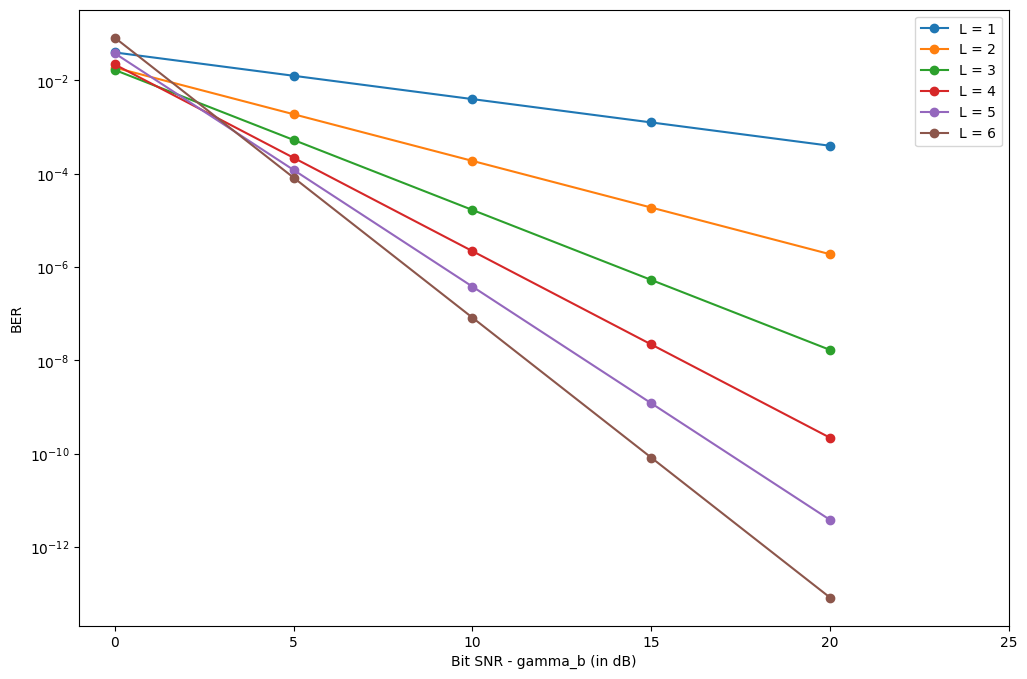

In [ ]:
plt.figure(figsize=(12, 8))
plt.tight_layout()
plt.ylabel('BER')
plt.xlabel('Bit SNR - gamma_b (in dB)')
for l in np.arange(1, 7):
  plt.plot(aser1_gb[l-1, :], label="L = " + str(l), marker='o')
plt.xticks(np.arange(6), np.arange(0, 26, 5))
plt.yscale('log')
#plt.ylim(10**-29, 10**-4)
#plt.xticks(np.arange(0, 1, step=1e-1))
plt.legend()

#### Deduction:
- For two systems with the same performance in terms of bit SNR, the system with more receive antennas requires less total transmit power
- As bit SNR increases, BER decreases.
